# Student Performance Analysis and Evaluation

Fall 2024 Data Science Project

Group Members: Hannah Chan (118805108), Anshu Chandrasekhar (118577982), Jessica Hoang (118841861), Eric Jiang (117994841), Naomi Kaul (118971650), Michelle Yu (117582567)

Contributions:

Anshu: Contributed to sections A, B, C, D, E, F, and G. She helped find the dataset to work with, conducted the chi square tests, contributed to training ML models like the Decision Tree, contributed to the ML analyses, and helped create the final report tutorial.

Jessica: Contributed to sections A, B, C, D, E, F, and G. She helped find the dataset to work with, conducted a few of the ANOVA tests, contributed to training ML models like the Linear Regression, contributed to the ML analyses, and helped create the final report tutorial.

Naomi: Contributed to sections A, B, C, D, E, F, and G. She helped find the dataset to work with, conducted a few of the ANOVA tests, contributed to training ML models like the Decision Tree, contributed to the ML analyses, fixed the formatting, and helped create the final report tutorial.

Eric: Contributed to sections A, B, C, D, E, and F. He helped clean up missing values in the data, contributed to training ML models like the Neural Network, and contributed to the Neural Network analysis.

Michelle: Contributed to sections A, B, C, D, E, and F. She helped verify the project idea, imported the necessary tools in the colab, helped write conclusions in part C, contributed to training ML models like the Linear Regression, and contributed the reasoning for our ML design.

Hannah: Contributed to sections A, B, C, E, and F. She helped verify the project idea, helped write conclusions in part C, wrote analyses for the ML tests that were conducted, and helped write the final conclusion.


# Introduction

Education plays an important role in shaping people into who they are and what they do in the future. This is why understanding what may affect student performance and grades is essential to improving education for all. For this project, our topic pertains to student performance in schools and how different contributing factors could impact student performance.

Our primary questions we are trying to answer are:

1. What are the internal and external factors that influence a student’s performance?

2. What are the effects these factors have on student performance and study habits?

As students, this dataset will give us insight into what affects our academic performance and whether or not these factors can be controlled or not (for example, family income may be a relevant factor, but this cannot typically be controlled). In order to improve the quality of our education, which is correlated with student performance, understanding the factors that impact student performance is essential. In this dataset, it would be expected to believe that hours studied impacts the exam scores of students, but we would have to test and validate that assumption. In order to understand what this data means, we will investigate the questions from above and attempt to answer them through this project. This would allow us to figure out which factors should be focused on to be improved and which ones to decrease since they have a negative impact on student performance.


# Data Curation

Dataset: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

We chose this dataset because it is crucial that we understand how different internal and external factors affect a student’s performance in school.  The particular dataset is effective for our objective because it contains 6,607 records and 20 different features, which provides a strong foundation for machine learning and predictive analysis. The size of the dataset is large enough to effectively train machine learning models and gain a diverse range of insights from it while being representative to the population. Each record in the dataset covers a wide range of factors from socioeconomic to physical variables, which would give us a lot of flexibility in the directions we take this project. This diversity is also incredibly important for developing accurate and nuanced predictions as it allows for the models to understand the complex realities of educational outcomes. The size of the dataset along with its richness ensures that meaningful models and predictions can be made with this data. By using this dataset, we hope to draw conclusions about the various factors that can influence the study habits and academic success of students.

Data Preprocessing:

(a) import, (b) parse (e.g., convert strings to ints), (c) organize (e.g., set up a database or a pandas DataFrame).

In [23]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
df = pd.read_csv('StudentPerformanceFactors.csv')
# print("Data does not need conversion/parsing since all data types seems to be as expected.")

**Verifying that Data Missingness is Random**

In [24]:
column_count = df.count()
print(column_count)

Hours_Studied                 6607
Attendance                    6607
Parental_Involvement          6607
Access_to_Resources           6607
Extracurricular_Activities    6607
Sleep_Hours                   6607
Previous_Scores               6607
Motivation_Level              6607
Internet_Access               6607
Tutoring_Sessions             6607
Family_Income                 6607
Teacher_Quality               6529
School_Type                   6607
Peer_Influence                6607
Physical_Activity             6607
Learning_Disabilities         6607
Parental_Education_Level      6517
Distance_from_Home            6540
Gender                        6607
Exam_Score                    6607
dtype: int64


Observation: There is data missing from the columns Teacher_Quality, Parental_Education_Level, and Distance_From_Home. We know this because every other column has 6607 data points, while the aforementioned have less than this number.

It's difficult to completely verify that the data missingness is random. To help us combat this, we created a MissingNo matrix. From the matrix, we can see the white lines are the missing rows from each column.

The white lines show where the data is missing from each column. You can see that the white lines don't line up between each column so there isn't that much of a correlation between missing values between each column.

The heatmap also shows very little correlation between the different columns, also suggesting that the data from each category do not impact the missingness of one another.

We should be safe to drop the rows that have missing data as they are most likely MCAR based on the analysis below and are a very small percentage of the entire dataset (~250/6000).

<Axes: >

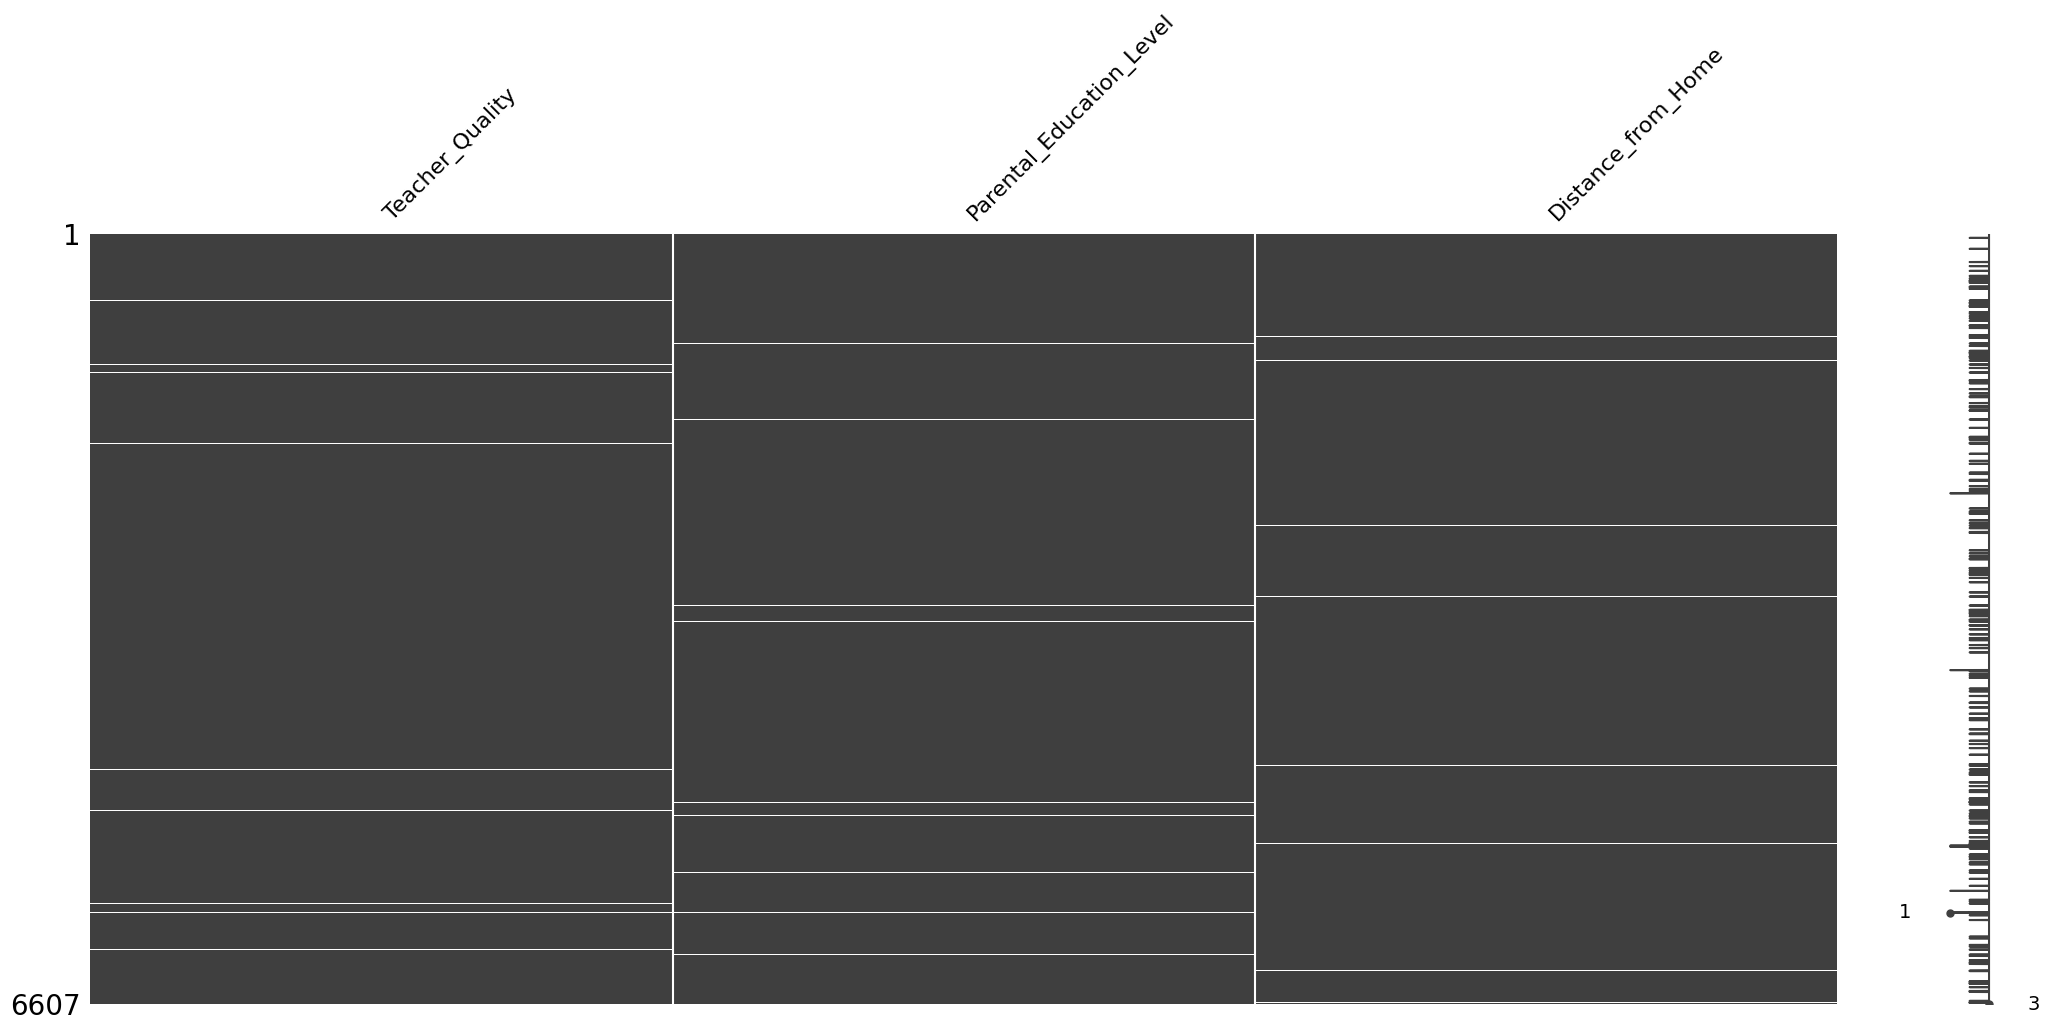

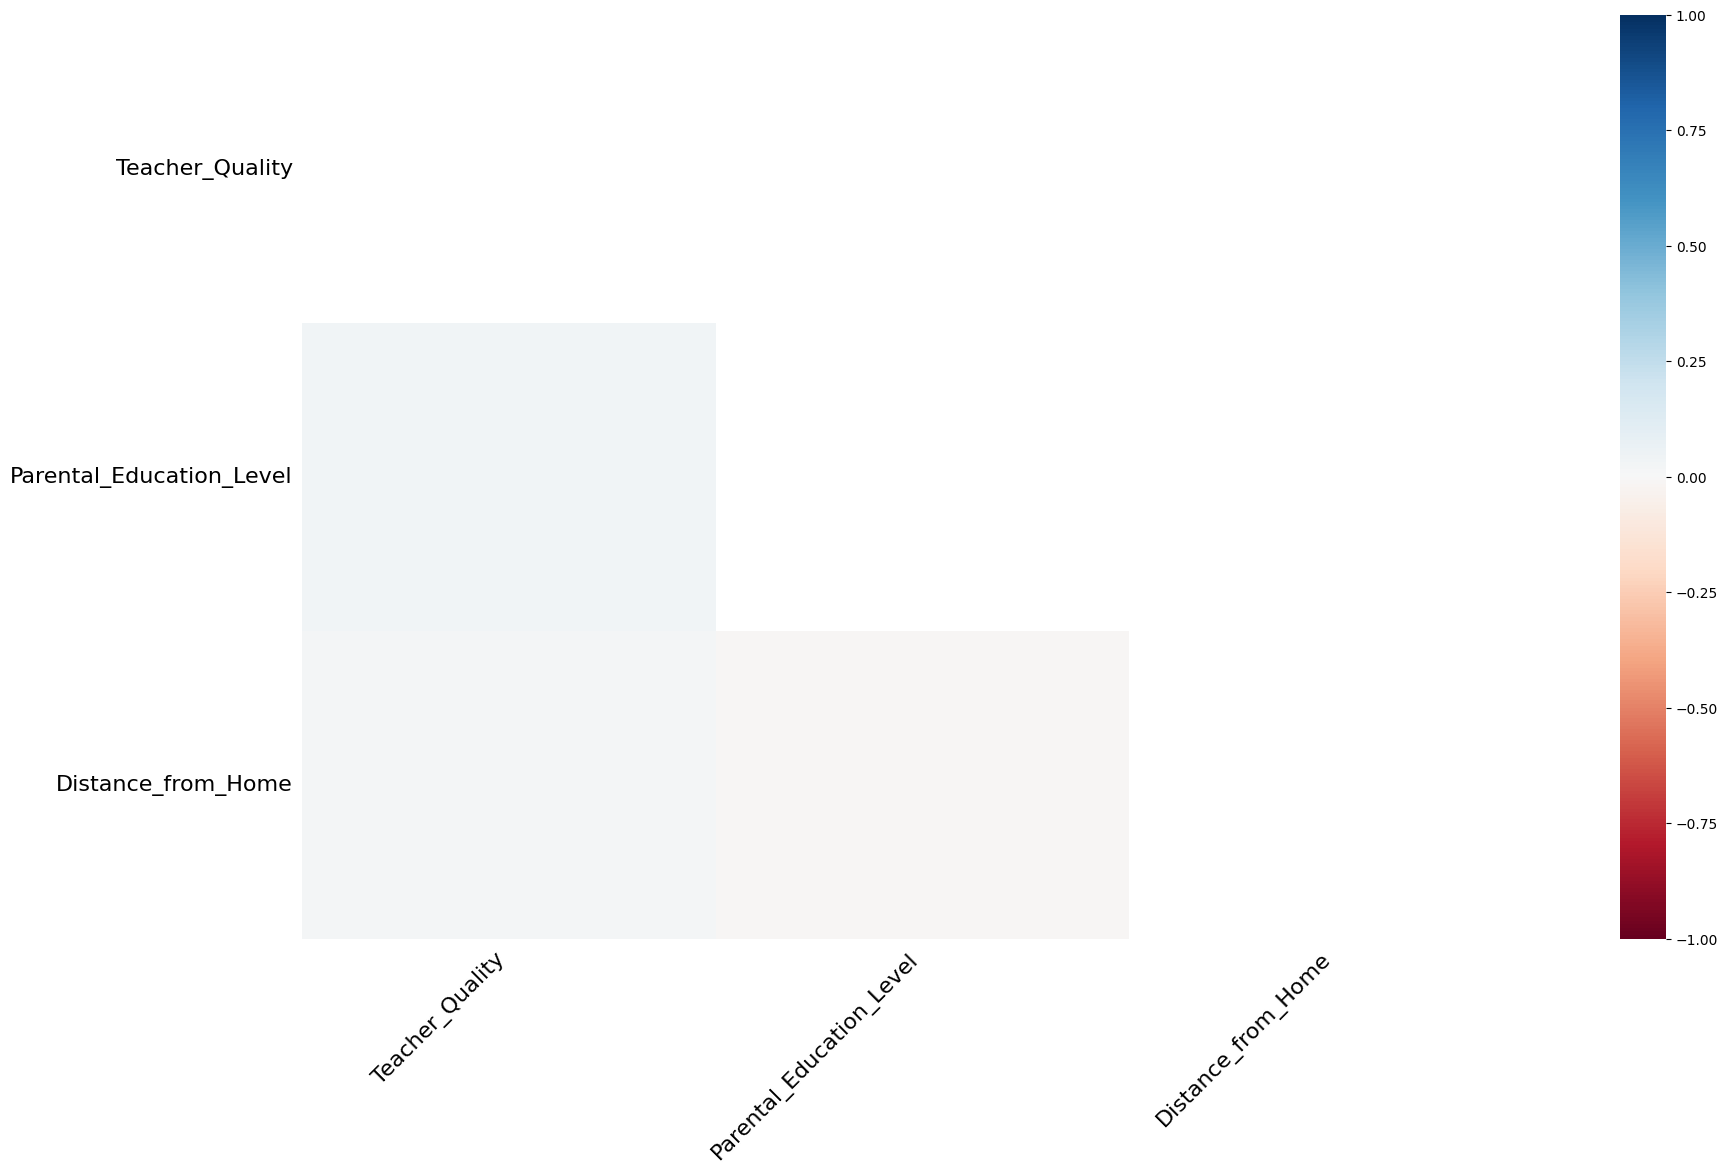

In [25]:
columns_with_missing_data = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
msno.matrix(df[columns_with_missing_data])
msno.heatmap(df[columns_with_missing_data])

**Dropping the data and converting categorical**


In [26]:
df = df.dropna().copy()

ordered_mapping = {
    'Parental_Involvement': {'Low': 1, 'Medium': 2, 'High': 3},
    'Access_to_Resources': {'Low': 1, 'Medium': 2, 'High': 3},
    'Motivation_Level': {'Low': 1, 'Medium': 2, 'High': 3},
    'Family_Income': {'Low': 1, 'Medium': 2, 'High': 3},
    'Teacher_Quality': {'Low': 1, 'Medium': 2, 'High': 3},
    'Peer_Influence': {'Negative': -1, 'Neutral': 0, 'Positive': 1},
    'Parental_Education_Level': {'High School': 1, 'College': 2, 'Postgraduate': 3},
    'Distance_from_Home': {'Near': 1, 'Moderate': 2, 'Far': 3},
}

binary_mapping = {
    'Extracurricular_Activities': {'No': 0, 'Yes': 1},
    'Internet_Access': {'No': 0, 'Yes': 1},
    'School_Type': {'Public': 0, 'Private': 1},
    'Learning_Disabilities': {'No': 0, 'Yes': 1},
    'Gender': {'Male': 0, 'Female': 1}
}


for col, relationship in ordered_mapping.items():
  df[col]  = df[col].map(relationship)
for col, relationship in binary_mapping.items():
  df[col] = df[col].map(relationship)

print(df)





      Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0                23          84                     1                    3   
1                19          64                     1                    2   
2                24          98                     2                    2   
3                29          89                     1                    2   
4                19          92                     2                    2   
...             ...         ...                   ...                  ...   
6602             25          69                     3                    2   
6603             23          76                     3                    2   
6604             20          90                     2                    1   
6605             10          86                     3                    3   
6606             15          67                     2                    1   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores 

##Exploratory Data Analysis##


In [27]:
# number of rows and columns
df.shape

(6378, 20)

In [28]:
# columns
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [29]:
# data types
df.dtypes

,0
Hours_Studied,int64
Attendance,int64
Parental_Involvement,int64
Access_to_Resources,int64
Extracurricular_Activities,int64
Sleep_Hours,int64
Previous_Scores,int64
Motivation_Level,int64
Internet_Access,int64
Tutoring_Sessions,int64


In [30]:
# summary statistics
df.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6378.000000,6378.000000,6378.00000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,2.08545,2.098150,0.596896,7.034964,75.066165,1.907965,0.923957,1.495296,1.788021,2.197241,0.304798,0.191753,2.972719,0.104735,1.705394,1.503763,0.421762,67.252117
std,5.985460,11.550723,0.69502,0.698635,0.490560,1.468033,14.400389,0.695758,0.265087,1.233984,0.743526,0.601064,0.460358,0.756394,1.028926,0.306236,0.780570,0.670442,0.493880,3.914217
min,1.000000,60.000000,1.00000,1.000000,0.000000,4.000000,50.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,55.000000
25%,16.000000,70.000000,2.00000,2.000000,0.000000,6.000000,63.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,65.000000
50%,20.000000,80.000000,2.00000,2.000000,1.000000,7.000000,75.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,67.000000
75%,24.000000,90.000000,3.00000,3.000000,1.000000,8.000000,88.000000,2.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000,4.000000,0.000000,2.000000,2.000000,1.000000,69.000000
max,44.000000,100.000000,3.00000,3.000000,1.000000,10.000000,100.000000,3.000000,1.000000,8.000000,3.000000,3.000000,1.000000,1.000000,6.000000,1.000000,3.000000,3.000000,1.000000,101.000000


**Hypothesis Testing**

The p value is 2.722170228732002e-40


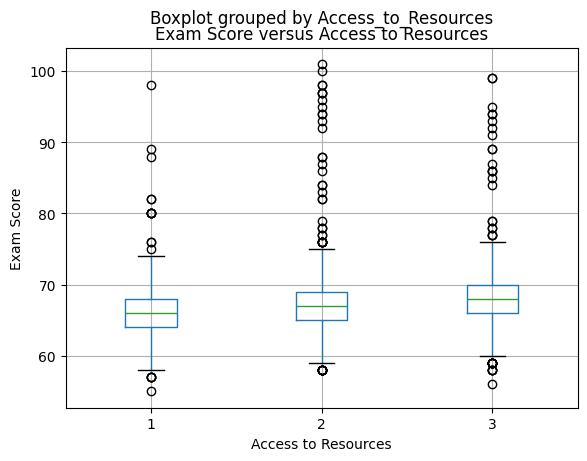

In [31]:
# ANOVA test, comparing access to resources vs exam score
from scipy.stats import f_oneway
low_df = df[df['Access_to_Resources'] == 1]['Exam_Score']
med_df = df[df['Access_to_Resources'] == 2]['Exam_Score']
high_df = df[df['Access_to_Resources'] == 3]['Exam_Score']


print("The p value is " + f_oneway(low_df, med_df, high_df).pvalue.astype(str))

df.boxplot('Exam_Score', 'Access_to_Resources')

plt.xlabel('Access to Resources')
plt.ylabel('Exam Score')
plt.title('Exam Score versus Access to Resources')
plt.show()


Null Hypothesis: There is no relationship between access to resources and the exam score received

Alternative Hypothesis: There is a relationship between access to resources and the exam score received

Analysis: The p-value of 2.72e-40 (which is less than 0.05) so we can reject the null hypothesis and this indicates that access to resources has a significant impact on exam performance, making it extremely unlikely that the observed differences occurred by chance.

The p value is 8.844704258489237e-09


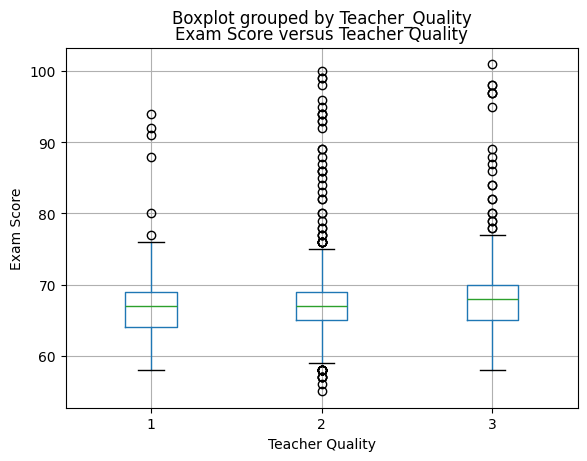

In [32]:
# ANOVA test #2, comparing teacher quality to exam score
low_df = df[df['Teacher_Quality'] == 1]['Exam_Score']
med_df = df[df['Teacher_Quality'] == 2]['Exam_Score']
high_df = df[df['Teacher_Quality'] == 3]['Exam_Score']


print("The p value is " + f_oneway(low_df, med_df, high_df).pvalue.astype(str))

df.boxplot('Exam_Score', 'Teacher_Quality')

plt.xlabel('Teacher Quality')
plt.ylabel('Exam Score')
plt.title('Exam Score versus Teacher Quality')
plt.show()




Null Hypothesis: There is no relationship between teacher quality and exam scores

Alternative Hypothesis: There is a relationship between teacher quality and exam scores

Analysis: Teacher quality appears to be an important factor that is influencing exam performance. The significant p-value of 8.84e-09 (which is less than 0.05) so we can reject the null hypothesis which suggests that the differences observed between groups are unlikely to be due to chance. Better teacher quality is correlated with higher exam scores.

The p value is 9.000204034394693e-12


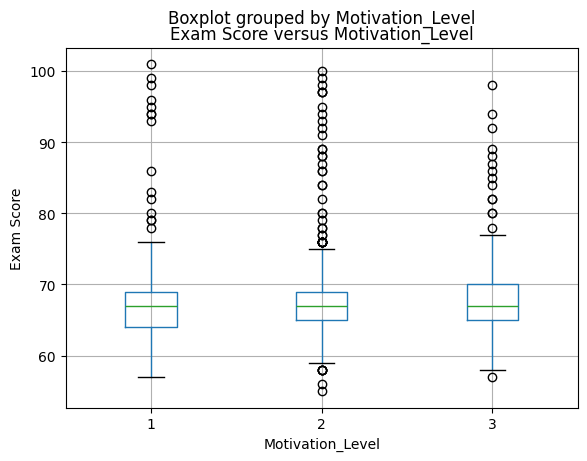

In [33]:
# ANOVA test #3, comparing peer influence to exam score
low_df = df[df['Motivation_Level'] == 1]['Exam_Score']
med_df = df[df['Motivation_Level'] == 2]['Exam_Score']
high_df = df[df['Motivation_Level'] == 3]['Exam_Score']


print("The p value is " + f_oneway(low_df, med_df, high_df).pvalue.astype(str))

df.boxplot('Exam_Score', 'Motivation_Level')

plt.xlabel('Motivation_Level')
plt.ylabel('Exam Score')
plt.title('Exam Score versus Motivation_Level')
plt.show()




Null Hypothesis: There is no relationship between motivation levels and exam scores

Alternative Hypothesis: There is a relationship between motivation levels and exam scores

Analysis: The p-value of 9.00e-12 (which is less than 0.05) so we reject the null hypothesis and this shows a clear and statistically significant relationship between motivation level and exam performance. The boxplots show that higher motivation levels may lead to more variability in exam scores, while lower motivation seems to correlate with more consistent (though not higher) scores.

**Two Sample t-test**


The p-value of our t-test is 0.3854987810270891


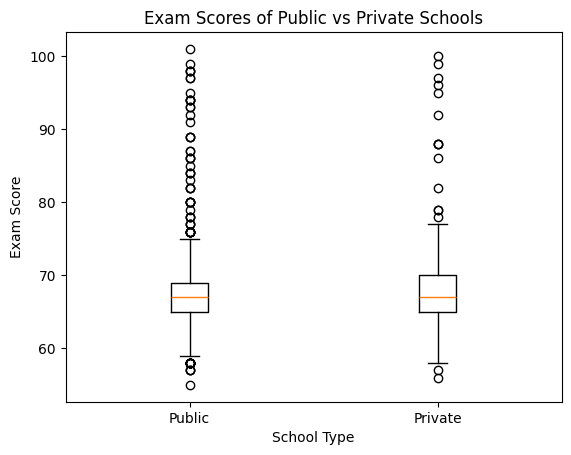

In [34]:
# We'd like to determine if there's a significant difference between the exam scores of public vs private schools
from scipy.stats import ttest_ind

df.head()
public = df[(df['School_Type'] == 0)]['Exam_Score']
private = df[(df['School_Type'] == 1)]['Exam_Score']
print("The p-value of our t-test is", ttest_ind(public, private).pvalue)
plt.boxplot([public, private], labels=['Public', 'Private'])
plt.title('Exam Scores of Public vs Private Schools')
plt.xlabel('School Type')
plt.ylabel('Exam Score')
plt.show()

Null Hypothesis: There is no difference between the exam scores from public schools and exam scores from private schools.

Alternative Hypothesis: There is a difference, either negative or positve, between exam scores from public schools and exam scores from private schools.

Analysis: The p-value of 0.385 (which is greater than 0.05) so we fail to reject the null hypothesis and this indicates that there is no significant difference in exam performance between public and private school students. The wide variability in individual performances suggests that school type does not play a significan role in determining exam scores and that there are factors other than school type that could be more influential in determining exam scores.

**Chi Square Tests**

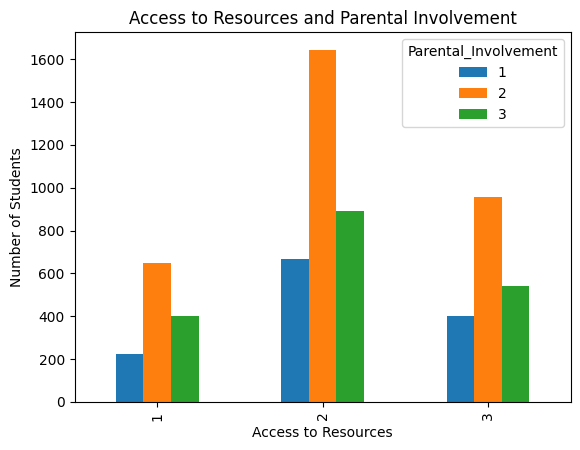

p-value: 0.0323107139976417


Parental_Involvement,1,2,3
Access_to_Resources,,,
1,223,649,402
2,668,1644,892
3,400,958,542


In [35]:
# Chi square test #1, comparing access to resources and parental involvement
from scipy.stats import chi2_contingency
tbl = pd.crosstab(df['Access_to_Resources'], df['Parental_Involvement'])
tbl.plot(kind = 'bar')
plt.title('Access to Resources and Parental Involvement')
plt.xlabel("Access to Resources")
plt.ylabel('Number of Students')
plt.show()
pval = chi2_contingency(tbl)
print(f"p-value: {pval.pvalue}")
tbl

Null Hypothesis: There is no relationship between access to resources and parental involvement

Alternative Hypothesis: There is a relationship between access to resources and parental involvement

Analysis: The chart shows a statistically significant relationship between access to resources and parental involvement because it has a p-value of 0.032 (which is less than 0.05) so we reject the null hypothesis. The chart suggests that students with moderate access to resources tend to have moderate levels of parental involvement, while those with high access to resources show a slightly more balanced distribution of involvement.

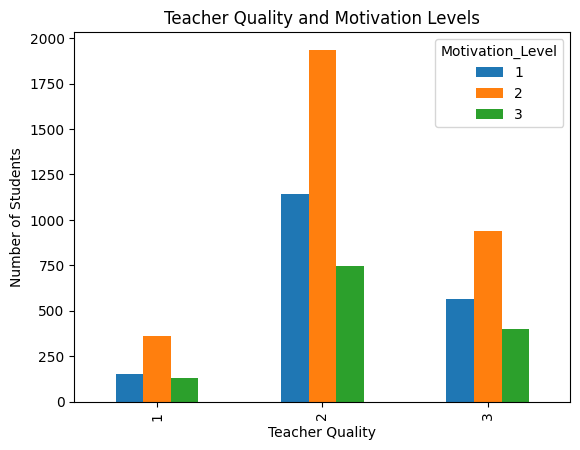

p-value: 0.00790126738097514


Motivation_Level,1,2,3
Teacher_Quality,,,
1,152,363,132
2,1144,1935,747
3,568,939,398


In [36]:
# Chi square test #2, comparing teacher quality and motivation levels
from scipy.stats import chi2_contingency
tbl = pd.crosstab( df['Teacher_Quality'], df['Motivation_Level'])
tbl.plot(kind = 'bar')
plt.title('Teacher Quality and Motivation Levels')
plt.xlabel("Teacher Quality")
plt.ylabel('Number of Students')
plt.show()
pval = chi2_contingency(tbl)
print(f"p-value: {pval.pvalue}")
tbl

Null Hypothesis: There is no relationship between teacher quality and student motivation levels

Alternative Hypothesis: There is a relationship between teacher quality and student motivation levels.

Analysis: The chart highlights a statistically significant relationship between teacher quality and student motivation levels with a p-value of 0.0079 (which is less than 0.05) so we reject the null hypothesis. The data suggests that teachers with a quality level of 2 are associated with the highest number of students with moderate motivation, while teachers with a quality level of 3 have a more balanced distribution across all motivation levels. Lower teacher quality appears to be linked to fewer students with high motivation, emphasizing the important role of teacher effectiveness in influencing student motivation.

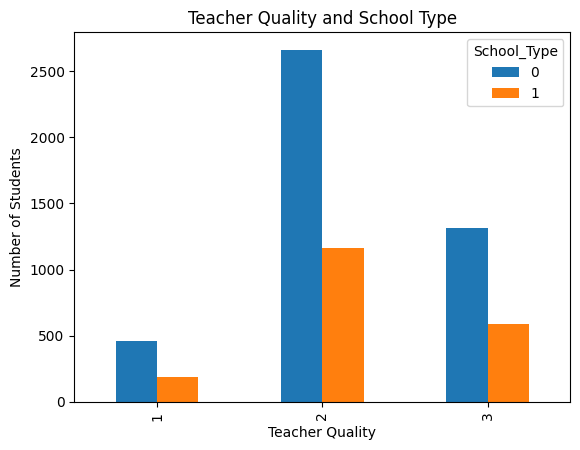

p-value: 0.7582962961792555


School_Type,0,1
Teacher_Quality,,
1,457,190
2,2661,1165
3,1316,589


In [37]:
# Chi square test #3, comparing teacher quality and school type
from scipy.stats import chi2_contingency
tbl = pd.crosstab(df['Teacher_Quality'], df['School_Type'])
tbl.plot(kind = 'bar')
plt.title('Teacher Quality and School Type')
plt.xlabel("Teacher Quality")
plt.ylabel('Number of Students')
plt.show()
pval = chi2_contingency(tbl)
print(f"p-value: {pval.pvalue}")
tbl

Null Hypothesis: There is no difference between teacher quality and school type

Alternative Hypothesis: There is a difference between teacher quality and school type

Analysis: The analysis indicates that there is no significant difference in teacher quality distribution between public and private schools, as reflected by the high p-value of 0.758 (which is greater than 0.05) so we fail to reject the null hypothesis. While public schools (school type 0) tend to have a larger number of students across all teacher quality levels, the distribution of teacher quality is relatively similar across school types.

**Correlation Heat Map**

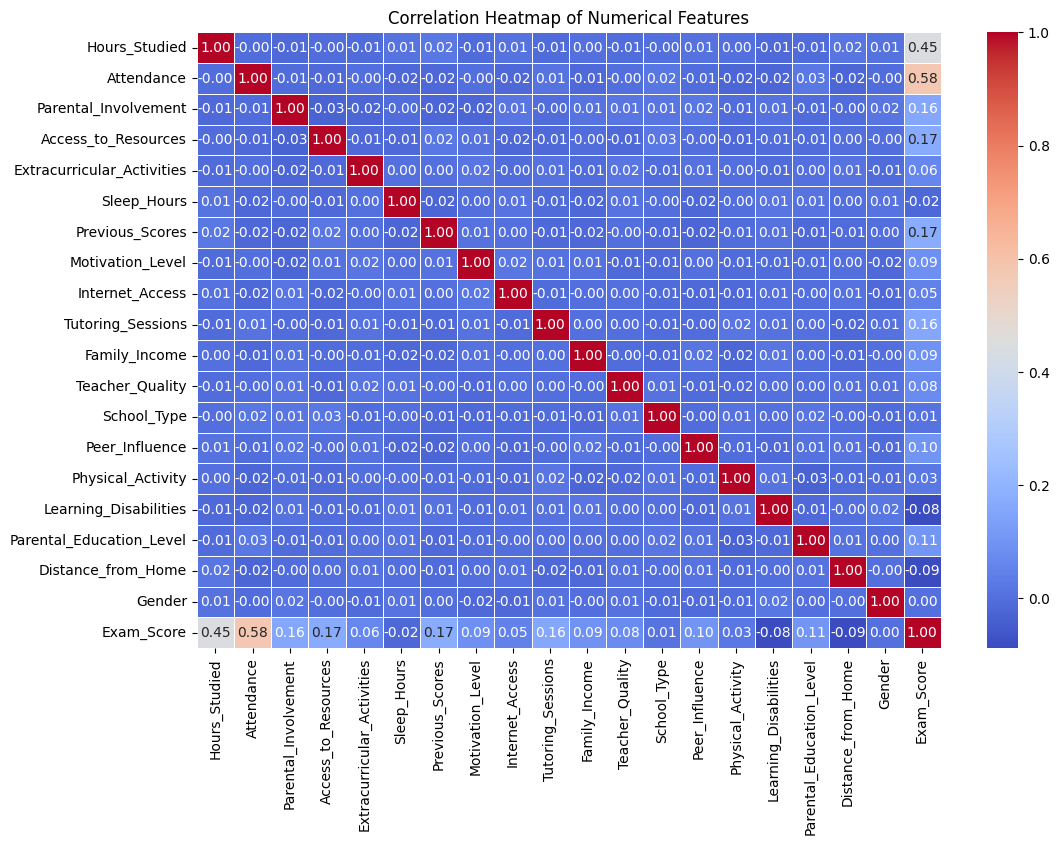

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numerical columns
correlation_matrix = df.corr()

# Plot the heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


Results and insights:

The heatmap reveals several key insights as to what factors could be influencing students' exam scores. Variables such as attendance and hours studied show the strongest positive correlations with exam performance. The correlation numbers of 0.58 (attendance) and 0.45 (study time) indicate that consistent attendance and dedicating time to study significantly contribute to better exam outcomes. Additionally, while other variables such as teacher quality (0.16) and parental involvement (0.10) have much lower correlation numbers, they also positively impact the students' performance. On the other hand, variables like distance from home (-0.10) and peer influence (-0.08) have small negative correlations. This suggests that students living further away from school or experiencing negative influence from friends, may face greater challenges in achieving higher exam scores. One interesting thing this heatmap reveals is that most factors, such as internet access, gender, and learning disabilities, show weak or negligible correlations with exam scores, indicating minimal influence with exam scores. This analysis highlights the importance of students having good attendance, study habits, and a supportive learning environment to improve their exam scores.

#Primary Analysis + Visualization

**Choosing Linear Regression**

Since we are looking to predict exam scores and figure out which predictors (variables) are significant in explaining our response value, we should use a linear regression model. This will allow us to predict a continuous, dependent variable/value while also allowing us to explore the relationships between exam score and the other variables using t-tests and f-tests. Having a MLR model also enables us to visually see if there was a general pattern, whether that be in a correlation matrix or scatter plot. This model would also allow us to predict an example student’s expected exam score depending on the specific variable values we decide on. This would provide us insight on what the expected performance of a student will be and allow us to hone in on our primary questions. Additionally, linear regressions are typically applicable to many scenarios, which would allow us to glean some information from it before deciding to delve further into the dataset.



**Encoding the Categorial Variables**


From our data exploration, we found that there was correlation between some of the categorical variables like access to resources, teacher quality, and motivation level. In order to use these variables within our linear regression model, we need to label encode these features so that they are converted from categorical to numerical format.

In [39]:
#label encoding categorical data
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Converting categorical data values into numerical values for linear regression model fitting using LabelEncoder
encoded_df = df.copy()
encoded_df['Parental_Involvement'] = LabelEncoder().fit_transform(encoded_df['Parental_Involvement'])
encoded_df['Access_to_Resources'] = LabelEncoder().fit_transform(encoded_df['Access_to_Resources'])
encoded_df['Motivation_Level'] = LabelEncoder().fit_transform(encoded_df['Motivation_Level'])
encoded_df['Family_Income'] = LabelEncoder().fit_transform(encoded_df['Family_Income'])
encoded_df['Teacher_Quality'] = LabelEncoder().fit_transform(encoded_df['Teacher_Quality'])
encoded_df['Peer_Influence'] = LabelEncoder().fit_transform(encoded_df['Peer_Influence'])
encoded_df['Parental_Education_Level'] = LabelEncoder().fit_transform(encoded_df['Parental_Education_Level'])
encoded_df['Distance_from_Home'] = LabelEncoder().fit_transform(encoded_df['Distance_from_Home'])
encoded_df['Extracurricular_Activities'] = LabelEncoder().fit_transform(encoded_df['Extracurricular_Activities'])
encoded_df['Internet_Access'] = LabelEncoder().fit_transform(encoded_df['Internet_Access'])
encoded_df['School_Type'] = LabelEncoder().fit_transform(encoded_df['School_Type'])
encoded_df['Learning_Disabilities'] = LabelEncoder().fit_transform(encoded_df['Learning_Disabilities'])
encoded_df['Gender'] = LabelEncoder().fit_transform(encoded_df['Gender'])

# printint out to check if one hot encoding worked
encoded_df.head(10)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,0,2,3,0,0,0,0,67
1,19,64,0,1,0,8,59,0,1,2,1,1,0,0,4,0,1,1,1,61
2,24,98,1,1,1,7,91,1,1,2,1,1,0,1,4,0,2,0,0,74
3,29,89,0,1,1,8,98,1,1,1,1,1,0,0,4,0,0,1,0,71
4,19,92,1,1,1,6,65,1,1,3,1,2,0,1,4,0,1,0,1,70
5,19,88,1,1,1,8,89,1,1,3,1,1,0,2,3,0,2,0,0,71
6,29,84,1,0,1,7,68,0,1,1,0,1,1,1,2,0,0,1,0,67
7,25,78,0,2,1,6,50,1,1,1,2,2,0,0,2,0,0,2,0,66
8,17,94,1,2,0,6,80,2,1,0,1,0,1,1,1,0,1,0,0,69
9,23,98,1,1,1,8,71,1,1,0,2,2,0,2,5,0,0,1,0,72


Mean Squared Error: 4.15
R-squared: 0.73


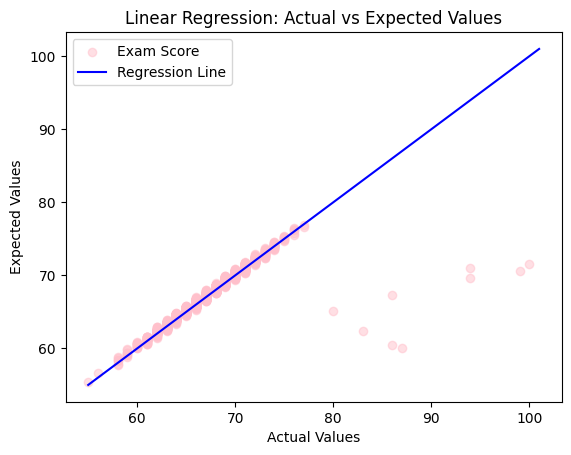

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# X is the predictors, Y is the response value to be predicted (exam score)
X = encoded_df.drop(['Exam_Score'], axis=1)
Y = encoded_df['Exam_Score']

#training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train) # fitting data

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred) #calculating MSE
r2 = r2_score(Y_test, Y_pred) #calculating r-squared

#printing values out
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

#plotting regression on scatter p
plt.scatter(Y_test, Y_pred, color='pink', alpha=0.5)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Expected Values')
plt.title('Linear Regression: Actual vs Expected Values')
plt.legend(['Exam Score', 'Regression Line'])
plt.show()


Results and insights:

The linear regression model predicting exam scores achieved a Mean Squared Error (MSE) of 4.15, indicating low average prediction error. The model also had an R-squared value of 0.73, meaning that 73% of the variability in exam scores is explained by the model.
<br>For the most part, exam score predictions were closely aligned with the actual exam scores, as seen in the scatterplot. This demonstrates the model's accuracy. However, because there are some outliers, this suggests that there are certain variables impacting exam performance that were not captured in the model. We should pivot to using a different model because of this non-linearity.

**Linear Regression**

Predicting values given specific characterstics

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def rank_features_by_r2(X, Y): #calculating r-squared values to rank significant of predictors
    r2_scores = []

    for feature in X.columns:
        X_feature = X[[feature]]

        X_train, X_test, Y_train, Y_test = train_test_split(X_feature, Y, test_size=0.3, random_state=42)

        model = LinearRegression()
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)

        r2 = r2_score(Y_test, Y_pred)
        r2_scores.append((feature, r2))

    r2_df = pd.DataFrame(r2_scores, columns=['Feature', 'R-squared'])
    r2_df = r2_df.sort_values(by='R-squared', ascending=False)
    return r2_df

r2_df = rank_features_by_r2(X, Y)
print(r2_df)

                       Feature  R-squared
1                   Attendance   0.360076
0                Hours_Studied   0.204662
6              Previous_Scores   0.030177
9            Tutoring_Sessions   0.029542
3          Access_to_Resources   0.028987
2         Parental_Involvement   0.024779
16    Parental_Education_Level   0.012347
15       Learning_Disabilities   0.007999
7             Motivation_Level   0.007269
17          Distance_from_Home   0.007110
13              Peer_Influence   0.007055
10               Family_Income   0.005077
4   Extracurricular_Activities   0.004356
8              Internet_Access   0.001882
11             Teacher_Quality   0.001272
14           Physical_Activity   0.000933
18                      Gender   0.000019
5                  Sleep_Hours  -0.000589
12                 School_Type  -0.000689


Results and Insights:

In this analysis, we ranked features by how much they individually explain changes in exam scores, using their R-squared values. The top variables influencing exam performance are Attendance (R² = 0.360676), Hours_Studied (R² = 0.240662), and Previous_Scores (R² = 0.031077). This reveals that showing up to class regularly and putting in time to study are some of the biggest predictors of success. Other variables, such as Tutoring_Sessions and Access_to_Resources, have some impact on exam scores but are not as strong. On the other hand, variables like Internet_Access, Gender, and Sleep_Hours have little to no effect on exam scores, with some even having a slight negative connection.

Before we pivot to a different ML model, let's see if we can use linear regression to predict how students score based off of their attendance.

Mean Squared Error: 9.99
R-squared: 0.36


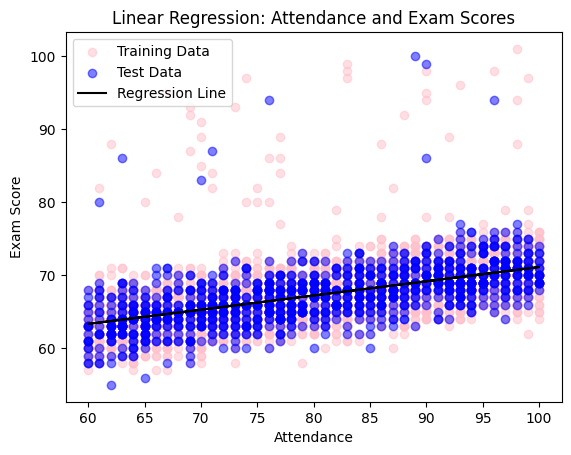

In [42]:
from sklearn.linear_model import LinearRegression
X = df[['Attendance']]
Y = df['Exam_Score']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

plt.scatter(X_train, Y_train, color='pink', alpha=0.5)
plt.scatter(X_test, Y_test, color='blue', alpha=0.5)
plt.plot(X_test, Y_pred, color='black')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.title('Linear Regression: Attendance and Exam Scores')
plt.legend( ['Training Data', 'Test Data', 'Regression Line'])
plt.show()

Results and insights:

This graph shows that students' exam scores are somewhat related to their attendance, as indicated by an R-squared value of 0.36, meaning 36% of the variation in exam scores can be explained by attendance. The trend line suggests that higher attendance generally leads to better scores, although the relationship is not perfect. The Mean Squared Error (MSE) of 9.99 reflects some prediction errors, and the scatterplot shows significant variation, particularly for students with high attendance who still scored lower. Overall, while attendance is an important factor, it is not the only one influencing exam performance, so other variables should be considered. We want to use a model that is better suited for categorical variables, so let's try a decision tree.

A decision tree would be an ideal machine learning model for us to try using because it help us classify the data. By relying on a tree structure with branches that help divide based on feature conditions, the tree can use its internal nodes to represent decisions taken and the leaf nodes can represent the final outputs determined by the model. We can use this evaluate our categorical data more effectively and rely on a nonlinear model.

**Decision Tree**

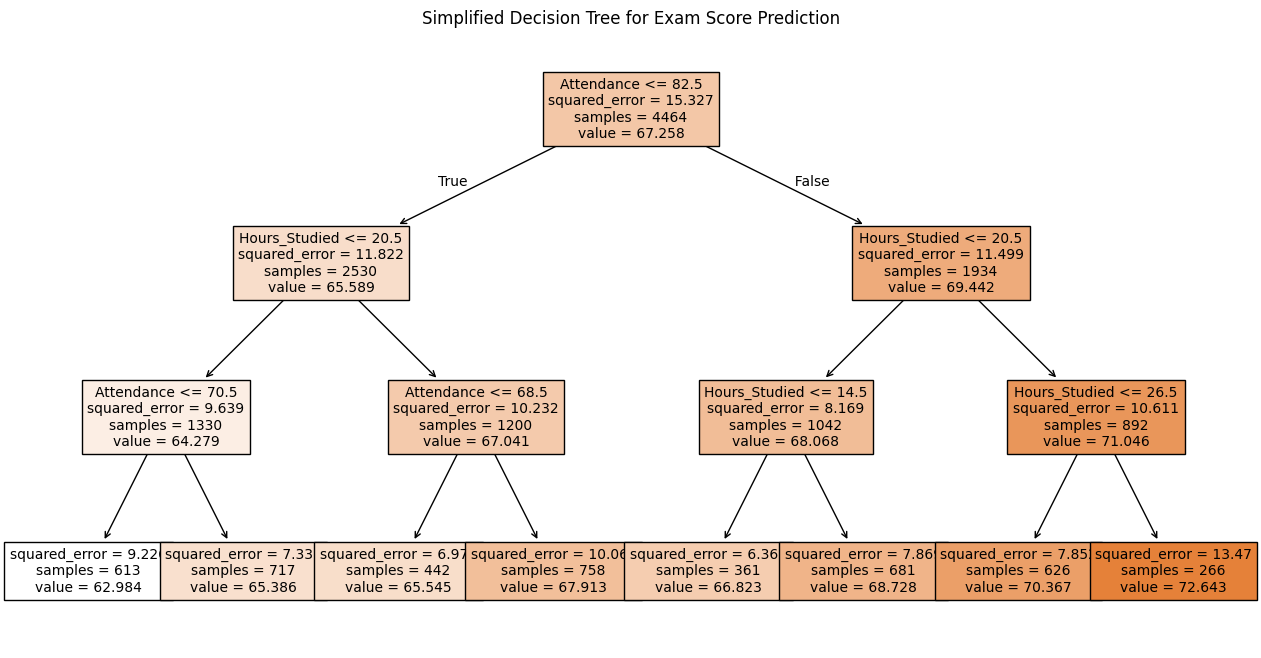

Mean Squared Error (MSE): 8.21
Root Mean Squared Error (RMSE): 2.87


In [43]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score
from sklearn.metrics import r2_score
import numpy as np

X = df[['Hours_Studied', 'Attendance', 'Motivation_Level']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor_limited = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor_limited.fit(X_train, y_train)

plt.figure(figsize=(16, 8))
tree.plot_tree(regressor_limited, feature_names=X.columns, filled=True, fontsize=10)
plt.title("Simplified Decision Tree for Exam Score Prediction")
plt.show()

y_pred = regressor_limited.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Results and insights:

The decision tree model predicts exam scores using Attendance and Hours_Studied, with attendance being the most significant factor, as seen in the first split with a threshold of 82.5. Students with higher attendance tend to achieve better exam scores, while more splits based on hours studied refine the predictions. The Mean Squared Error (MSE) of 8.21 and Root Mean Squared Error (RMSE) of 2.87 show improved accuracy compared to the previous models we used. The decision tree effectively splits students into groups with similar attendance and study behaviors, highlighting that both factors are important for exam performance. This model provides a clearer and more accurate understanding of how attendance and study habits together influence exam scores.

**Trying a Neural Network**

Let's try to achieve more accurate results with a Neural Network. Neural networks have interconnected nodes in a layered structure that are used to process and learn from the data. This model may produce more accurate results as NNs can model complex, non-linear relationships with its layered structure of neurons. Additionally, the decision tree may have lower accuracy with the non-linear data as there can be overfitting/underfitting when splitting the data into linear segments.

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
features = df[['Teacher_Quality', 'Motivation_Level', 'Access_to_Resources', 'Attendance', 'Hours_Studied', 'Previous_Scores']]
target = df['Exam_Score']

X = torch.tensor(features.values, dtype=torch.float32)
y = torch.tensor(target.values, dtype=torch.float32).unsqueeze(1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

class ExamScorePred(nn.Module):
    def __init__(self, size_input):
        super(ExamScorePred, self).__init__()
        self.fc1 = nn.Linear(size_input, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

size_input = X_train.shape[1]
model = ExamScorePred(size_input)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


def train_model(num_epo):
    model.train()
    for epoch in range(num_epo):
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

num_epo = 100
train_model(num_epo)

def eval_model():
    model.eval()
    with torch.no_grad():
        cumulative_loss = 0.0
        for data, target in test_loader:
            output = model(data)
            loss = criterion(output, target)
            cumulative_loss += loss.item() * data.size(0)
        average_loss = cumulative_loss / len(test_loader.dataset)
        print(f'Average loss during test: {average_loss:.4f}')

eval_model()


Epoch 1, Loss: 2846.81494140625
Epoch 2, Loss: 169.659912109375
Epoch 3, Loss: 82.6197738647461
Epoch 4, Loss: 68.3409652709961
Epoch 5, Loss: 64.7475357055664
Epoch 6, Loss: 87.10897064208984
Epoch 7, Loss: 38.4843864440918
Epoch 8, Loss: 28.66603660583496
Epoch 9, Loss: 9.854377746582031
Epoch 10, Loss: 8.453817367553711
Epoch 11, Loss: 10.930590629577637
Epoch 12, Loss: 3.838467836380005
Epoch 13, Loss: 3.935929775238037
Epoch 14, Loss: 2.2790110111236572
Epoch 15, Loss: 25.686695098876953
Epoch 16, Loss: 3.4186971187591553
Epoch 17, Loss: 4.4484453201293945
Epoch 18, Loss: 3.48549222946167
Epoch 19, Loss: 2.3891687393188477
Epoch 20, Loss: 1.818587064743042
Epoch 21, Loss: 19.16974449157715
Epoch 22, Loss: 18.72473907470703
Epoch 23, Loss: 2.4120399951934814
Epoch 24, Loss: 10.253436088562012
Epoch 25, Loss: 19.109827041625977
Epoch 26, Loss: 1.4084901809692383
Epoch 27, Loss: 2.7534103393554688
Epoch 28, Loss: 2.812809467315674
Epoch 29, Loss: 2.0188307762145996
Epoch 30, Loss: 3.



**Neural Network Analysis**

When implementing the neural network, we made a number of decisions regarding the architecture and features for the model

**Feature Engineering**:

We originally started with three features that we had looked into during our previous analysis. During our checkpoint 2, we analyzed Teacher_Quality, Motivation_Level, Access_to_Resources and found strong correlations between these and exam scores. We already chose these three to include into our neural network. The best we were able to get using just these three features is avg test loss of ~15.2. Thinking that we might be able to do better, we leveraged something we did earlier in this notebook which was ranking features based on their individual ability to predict the outcome in a regression model measured by R^2. We chose the top three which were Attendance, Hours_Studied, Previous_Scores.
Adding these three features into the neural network and adjusting accordingly allowed us to reach an avg test loss of ~6.7.

**Architectural design**: <br>
We originally started with three features and a single hidden layer of 16 that outputted to one node (3->16->1). This was not info data or information to properly learn the patterns. Our avg test loss was ~40. We knew we need to increase the complexity of the model to fit these more intricate patterns. We tried increasing the hidden layers: (3->32->16->1). We added an extra hidden layer of 32 nodes and this helped to get our avg test loss to ~15.2. At this point, no more changes in the size of the hidden layer or increases in the number of hidden layers seemed to make a meaningful improvement. We knew we needed to provide more data. We added in the three new features to make the input size a total of 6 features. After doing these changes, it initially hurt our avg test loss. It went up to ~24.7. Our theory for this was that we were providing too much data but our model wasn’t complex enough to learn meaningful patterns from this data. We knew we had to increase both the size of the hidden layers and the number of hidden layers. We added one more hidden layer that was larger than the previous (6->64->32->16->1) and this managed to get our avg test loss to ~6.7. Further tweaks have seemed to make much of a difference.
We chose ReLu because we needed to introduce non-linearities to this model. We tried leaky ReLu but it didn’t seem to help the model generalize any better. We also tried the MAE loss function and it didn’t improve the model. We are happy with our results of avg test loss of ~6.7 for the neural network although it is not as good as the random forest.



# Insights and Conclusions

Final Conclusion:

Our analysis provides valuable insights into the variables influencing student performance on exams through statistical analysis and machine learning models. Key findings suggest a strong correlation between hours studied, parental involvement, and previous scores with high exam scores. Hours of sleep and access to resources were also significant factors, emphasizing the importance of balanced lifestyles and support systems.

We used machine learning models, including linear regression, to predict academic performance and quantify the importance of different variables. These models were trained on a dataset containing over 6,600 data points with 20 features. However, the dataset itself had notable issues, including poor quality such as the range of grades being incredibly low. This required significant preprocessing to ensure the models produced reliable findings. Despite these challenges, the models identified multiple significant predictors like motivation level and teacher quality, offering data-driven insights into what impacts students' exam scores.

This project highlights actionable areas for educators and parents to enhance students' academic success by prioritizing the allocation of resources, fostering parental engagement, and encouraging good study habits. These findings demonstrate the value of combining machine learning with traditional analysis to focus on the factors that truly affect students' exam performance.